In [1]:
# official package: https://pypi.org/project/deep-sort-realtime/

In [5]:
!pip install deep-sort-realtime

   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.4 MB 289.3 kB/s eta 0:00:28
   -- ------------------------------------- 0.5/8.4 MB 289.3 kB/s eta 0:00:28
   -- ------------------------------------- 0.5/8.4 MB 289.3 kB/s eta 0:00:28
   -- ------------------------------------- 0.5/8.4 MB 289.3 kB/s eta 0:00:2

In [5]:
import cv2 
import datetime 
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from deep_sort_realtime.deepsort_tracker import DeepSort

In [7]:
# load YOLO-V8 model 
yolo_8 = YOLO("yolov8n.pt")

In [9]:
# define object tracker
tracker = DeepSort(max_age=50)

In [11]:
# video paths 
cycle_path = "../single_cv/videos/byc.mp4"
video2_path = '../single_cv/videos/walk_cycle.mp4'
video3_path = '../single_cv/videos/walk_dog.mp4'
video4_path = "../single_cv/videos/football.mp4"
video5_path = "../single_cv/videos/demo.mp4"
video6_path = "../single_cv/videos/byc.mp4"

In [15]:
video = cv2.VideoCapture(video3_path)
height = 400
width = 600

while True:
    # get the current frame
    check, frame = video.read()
    if not check:
        print(f"Failed to grab the frame, please check you video!!")
        break
    # resized the frame with expected size 
    resized_frame = cv2.resize(frame, (width, height))
    pred_results = yolo_8(resized_frame)
    
    for result in pred_results:
        boxes = result.boxes  # Bounding boxes
        for box in boxes:
            cls = box.cls[0].cpu().numpy()  # Class index
            label = result.names[int(cls)]  # Get class label
            if label == "person":
                conf = box.conf[0].cpu().numpy()  # Confidence score
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get coordinates (x1, y1, x2, y2)
                
                # Draw bounding box on the frame
                color = (0, 255, 0)  # Green color for boxes (you can change this)
                cv2.rectangle(resized_frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
    
                # Put the label (class name) and confidence score on the frame
                text = f"{label} {conf:.2f}"
                cv2.putText(resized_frame, text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    
    # showing the video
    cv2.imshow('video', resized_frame)
    
    key = cv2.waitKey(1)
    # press Esc to break 
    if key == 27:
        break
    pass

video.release()
cv2.destroyAllWindows()


0: 448x640 (no detections), 58.0ms
Speed: 5.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 42.0ms
Speed: 3.0ms preprocess, 42.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 46.0ms
Speed: 2.0ms preprocess, 46.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 47.0ms
Speed: 1.0ms preprocess, 47.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 47.0ms
Speed: 2.0ms preprocess, 47.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 43.0ms
Speed: 2.0ms preprocess, 43.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 43.0ms
Speed: 1.0ms preprocess, 43.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 44.0ms
Speed: 1.0ms preprocess, 44.0ms i

In [13]:
# running videos 
boxing_path = "../r_videos/boxing_1.mp4"
car1_path = "../r_videos/car_1.mp4"
car2_path = "../r_videos/car_2.mp4"
car3_path = "../r_videos/car_3.mp4"
car4_path = "../r_videos/car_4.mp4"
horse_path = "../r_videos/horse_1.mp4"
run1_path = "../r_videos/run_1.mp4"
run2_path = "../r_videos/run_2.mp4"
run3_path = "../r_videos/run_3.mp4"
run4_path = "../r_videos/run_4.mp4"
run5_path = "../r_videos/run_5.mp4"
sports1_path = "../r_videos/sports_1.mp4"
sports2_path = "../r_videos/sports_2.mp4"

In [15]:
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Initialize DeepSORT tracker
tracker = DeepSort(max_age=50, max_iou_distance=0.5, nn_budget=70)

# Define video input
video = cv2.VideoCapture(run1_path)

# Set fixed frame size
fixed_width, fixed_height = 600, 400  

while True:
    check, frame = video.read()
    if not check:
        print("Failed to grab the frame, check your video!")
        break

    # Resize frame for processing
    resized_frame = cv2.resize(frame, (fixed_width, fixed_height))

    # Run YOLO detection on resized frame
    pred_results = model(resized_frame)

    detections = []
    for result in pred_results:
        for box in result.boxes:
            cls = int(box.cls[0].cpu().numpy())  # Class index
            label = result.names[cls]  

            if label == "person":  # Change to "car" for vehicle tracking
                conf = float(box.conf[0].cpu().numpy())
                if conf < 0.5:
                    continue  

                # Bounding box in resized frame coordinates
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                detections.append(([x1, y1, x2-x1, y2-y1], conf, cls))  # LTRB format for DeepSORT

    # Update tracker using resized frame detections
    tracks = tracker.update_tracks(detections, frame=resized_frame)

    # Draw tracking results
    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        x1, y1, x2, y2 = track.to_ltrb().astype(int)

        # Draw bounding box on resized frame
        cv2.rectangle(resized_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(resized_frame, f"ID {track_id}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display resized frame
    cv2.imshow('DeepSORT', resized_frame)

    if cv2.waitKey(1) & 0xFF == 27:  # Press ESC to exit
        break

video.release()
cv2.destroyAllWindows()



0: 448x640 1 person, 49.0ms
Speed: 3.0ms preprocess, 49.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 42.0ms
Speed: 2.0ms preprocess, 42.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 42.0ms
Speed: 1.0ms preprocess, 42.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 45.0ms
Speed: 1.0ms preprocess, 45.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 42.0ms
Speed: 1.0ms preprocess, 42.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 41.0ms
Speed: 2.0ms preprocess, 41.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 42.0ms
Speed: 2.0ms preprocess, 42.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 43.0ms
Speed: 2.0ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 44

In [27]:
def get_track(file_path, tracker, desired_obj, height=600, width=800):
    # Keep a dictionary to store previous positions for each tracker ID
    tracker_positions = {}
    
    video = cv2.VideoCapture(file_path)
    # height = 600
    # width = 800
    
    frame_count = 0
    
    while True:
        # get the current frame
        check, frame = video.read()
        if not check:
            print(f"Failed to grab the frame, please check your video!")
            break
    
        # Resize the frame to the expected size
        resized_frame = cv2.resize(frame, (width, height))
        pred_results = yolo_8(resized_frame)
    
        detections = []
    
        for result in pred_results:
            boxes = result.boxes  # Bounding boxes
            for box in boxes:
                cls = box.cls[0].cpu().numpy()  # Class index
                label = result.names[int(cls)]  # Get class label
                if label == desired_obj:
                    conf = box.conf[0].cpu().numpy()  # Confidence 
                    if conf < 0.5:
                        continue 
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get coordinates (x1, y1, x2, y2)
                    cls_name = label
                    detections.append(([x1, y1, x2-x1, y2-y1], conf, cls))  # Format for DeepSORT
    
        # Get the tracked objects
        # Update tracker using resized frame detections
        tracks = tracker.update_tracks(detections, frame=resized_frame)
        # Draw tracking results
        for track in tracks:
            if not track.is_confirmed():
                continue

            track_id = track.track_id
            x1, y1, x2, y2 = track.to_ltrb().astype(int)
    
            # Draw the bounding box
            cv2.rectangle(resized_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(resized_frame, f"ID {track_id}: {cls_name}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
            # Get current position of the tracked object (center point of the bounding box)
            current_position = (int((x1 + x2) / 2), int((y1 + y2) / 2))
    
            # Store previous positions for each object
            if track_id not in tracker_positions:
                tracker_positions[track_id] = {'positions': [], 'time': [], 'object': []}
    
            # Append current position to the list of positions for the current object
            tracker_positions[track_id]['positions'].append(current_position)
            tracker_positions[track_id]['time'].append(frame_count)
            tracker_positions[track_id]['object'].append(cls_name)
    
            # Draw a red point (circle) at the current position
            cv2.circle(resized_frame, current_position, 5, (0, 0, 255), -1)  # Red point
    
            # Draw a blue line connecting previous positions to the current position
            if len(tracker_positions[track_id]['positions']) > 1:
                for i in range(1, len(tracker_positions[track_id]['positions'])):
                    cv2.line(resized_frame, 
                             tracker_positions[track_id]['positions'][i - 1], 
                             tracker_positions[track_id]['positions'][i], 
                             (255, 0, 0), 2)  # Blue line
    
        # Show the video frame with bounding boxes and tracking lines
        cv2.imshow('DeepSORT', resized_frame)
    
        key = cv2.waitKey(1)
        if key == 27:
            break
    
        frame_count += 1
    
    video.release()
    cv2.destroyAllWindows()
    return tracker_positions

In [41]:
# function to print the trajectory of tracked objects 
def plot_tracking_trajectory(tr_maps, image_width=800, image_height=600):
    # Create a plot
    fig, ax = plt.subplots()
    ax.set_title("Object Tracking Trajectories")
    ax.set_xlabel("X Position (Pixels)")
    ax.set_ylabel("Y Position (Pixels)")
    
    # Get the frame width and height
    # image_width = 800   # Use the width of the processed video frames
    # image_height = 600 # Use the height of the processed video frames
    
    # Plot the corrected trajectories
    for trk_id, data in tr_maps.items():
        x_vals = [image_width - pos[0] for pos in data['positions']]  # Flip X-coordinates
        y_vals = [image_height - pos[1] for pos in data['positions']] # Flip Y-coordinates
        
        obj_name = data['object']
        print(f"Total frame captured in ID: {trk_id}: {len(obj_name)}")
    
        ax.plot(x_vals, y_vals, marker='o', linestyle='-', label=f"{trk_id}: {obj_name[0]}")
    
    ax.legend()
    plt.show()

In [68]:
# tr_maps = get_track(boxing_path, tracker=tracker, desired_obj='person', height=500, width=700)
# tr_maps = get_track(car1_path, tracker=tracker, desired_obj='car', height=600, width=400)
# tr_maps = get_track(car2_path, tracker=tracker, desired_obj='car', height=400, width=600)
# tr_maps = get_track(car3_path, tracker=tracker, desired_obj='car', height=600, width=800)
# tr_maps = get_track(car4_path, tracker=tracker, desired_obj= 'car', height=650, width=450)
# tr_maps = get_track(horse_path, tracker=tracker, desired_obj='horse', height=400, width=600)
# tr_maps = get_track(run1_path, tracker=tracker, desired_obj='person', height=400, width=600)
# tr_maps = get_track(run2_path, tracker=tracker, desired_obj='person', height=400, width=600)
tr_maps = get_track(video4_path, tracker=tracker, desired_obj='sports ball', height=400, width=600)
# tr_maps = get_track(run4_path, tracker=tracker, desired_obj='person', height=400, width=600)
# tr_maps = get_track(run5_path, tracker=tracker, desired_obj='dog', height=400, width=600)
# tr_maps = get_track(sports1_path, tracker=tracker, desired_obj='person', height=500, width=350)
# tr_maps = get_track(sports2_path, tracker=tracker, desired_obj='person', height=500, width=350)


0: 448x640 6 persons, 1 sports ball, 41.0ms
Speed: 2.0ms preprocess, 41.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 6 persons, 1 sports ball, 58.0ms
Speed: 2.0ms preprocess, 58.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 6 persons, 1 sports ball, 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 6 persons, 1 sports ball, 38.0ms
Speed: 1.0ms preprocess, 38.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 7 persons, 1 sports ball, 46.0ms
Speed: 2.0ms preprocess, 46.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 7 persons, 1 sports ball, 48.0ms
Speed: 1.0ms preprocess, 48.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 8 persons, 1 sports ball, 44.0ms
Speed: 2.0ms preprocess, 44.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 44

Total frame captured in ID: 58: 49
Total frame captured in ID: 62: 49
Total frame captured in ID: 67: 49
Total frame captured in ID: 68: 392
Total frame captured in ID: 69: 56
Total frame captured in ID: 70: 133
Total frame captured in ID: 76: 51
Total frame captured in ID: 81: 53
Total frame captured in ID: 83: 100
Total frame captured in ID: 87: 108
Total frame captured in ID: 88: 105
Total frame captured in ID: 90: 45


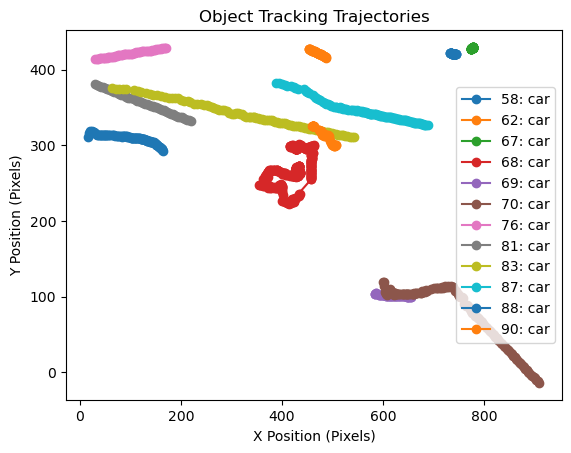

In [62]:
plot_tracking_trajectory(tr_maps)

#### Scratch Idea

In [ ]:
%%writefile detect_track.py
# YOLOv5 ? by Ultralytics, GPL-3.0 license.
"""
Run inference on images, videos, directories, streams, etc.
 
Usage - sources:
    $ python path/to/detect.py --weights yolov5s.pt --source 0             
 # webcam
                                                            
 img.jpg      # image
                                                            
 vid.mp4       # video
                                                             
path/         # directory
                                                             
path/*.jpg    # glob
                                                             
'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                             
'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
"""
 
import argparse
import os
import sys
from pathlib import Path
 
import torch
import torch.backends.cudnn as cudnn
 
FILE = Path(__file__).resolve()
ROOT = FILE.parents[0]  # YOLOv5 root directory.
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # Add ROOT to PATH.
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # Relative.
 
# DeepSORT -> Importing DeepSORT.
from deep_sort.application_util import preprocessing
from deep_sort.deep_sort import nn_matching
from deep_sort.deep_sort.detection import Detection
from deep_sort.deep_sort.tracker import Tracker
from deep_sort.tools import generate_detections as gdet
 
 
from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                          increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
 
 
@torch.no_grad()
def run(
        weights=ROOT / 'yolov5s.pt',  # model.pt path(s)
        source=ROOT / 'data/images',  # file/dir/URL/glob, 0 for webcam
        data=ROOT / 'data/coco128.yaml',  # dataset.yaml path.
        imgsz=(640, 640),  # Inference size (height, width).
        conf_thres=0.25,  # Confidence threshold.
        iou_thres=0.45,  # NMS IOU threshold.
        max_det=1000,  # Maximum detections per image.
        device='',  # Cuda device, i.e. 0 or 0,1,2,3 or cpu.
        view_img=False,  # Show results.
        save_txt=False,  # Save results to *.txt.
        save_conf=False,  # Save confidences in --save-txt labels.
        save_crop=False,  # Save cropped prediction boxes.
        nosave=False,  # Do not save images/videos.
        classes=None,  # Filter by class: --class 0, or --class 0 2 3.
        agnostic_nms=False,  # Class-agnostic NMS.
        augment=False,  # Augmented inference.
        visualize=False,  # Visualize features.
        update=False,  # Update all models.
        project=ROOT / 'runs/detect',  # Save results to project/name.
        name='exp',  # Save results to project/name.
        exist_ok=False,  # Existing project/name ok, do not increment.
        line_thickness=3,  # Bounding box thickness (pixels).
        hide_labels=False,  # Hide labels.
        hide_conf=False,  # Hide confidences.
        half=False,  # Use FP16 half-precision inference.
        dnn=False,  # Use OpenCV DNN for ONNX inference.
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # Save inference images.
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # Download.
 
    # DeepSORT -> Initializing tracker.
    max_cosine_distance = 0.4
    nn_budget = None
    model_filename = './model_data/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename, batch_size=1)
    metric = nn_matching.NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker = Tracker(metric)
    
    # Directories.
    if not os.path.isdir('./runs/'):
      os.mkdir('./runs/')
    save_dir = os.path.join(os.getcwd(), "runs")
    print(save_dir)
    '''save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir'''
 
    # Load model.
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # Check image size.
 
    # Dataloader.
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # Set True to speed up constant image size inference.
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
        bs = len(dataset)  # batch_size.
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
        bs = 1  # batch_size.
    vid_path, vid_writer = [None] * bs, [None] * bs
 
    # Run inference.
    model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # Warmup.
    dt, seen = [0.0, 0.0, 0.0], 0
    frame_idx=0
    for path, im, im0s, vid_cap, s in dataset:
        t1 =  time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32.        im /= 255  # 0 - 255 to 0.0 - 1.0
        if len(im.shape) == 3:
            im = im[None]  # Expand for batch dim.
        t2 = time_sync()
        dt[0] += t2 - t1
 
        # Inference.
        visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
        pred = model(im, augment=augment, visualize=visualize)
        t3 = time_sync()
        dt[1] += t3 - t2
 
        # NMS.
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3
 
        # Second-stage classifier (optional).
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)
 
        frame_idx=frame_idx+1
        # Process predictions.
        for i, det in enumerate(pred):  # Per image.
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)
 
            p = Path(p)  # To Path.
            print("stem", p.stem)
            print("dir", save_dir)
            save_path = os.path.join(save_dir, p.name)  # im.jpg
            txt_path = os.path.join(save_dir , p.stem) # im.txt
            s += '%gx%g ' % im.shape[2:]  # Print string.
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # Normalization gain whwh.
            imc = im0.copy() if save_crop else im0  # For save_crop.
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
 
            if len(det):
                # Rescale boxes from img_size to im0 size.
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()
 
                # Print results.
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # Detections per class.
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # Add to string.
 
                # DeepSORT -> Extracting Bounding boxes and its confidence scores.
                bboxes = []
                scores = []
                for *boxes, conf, cls in det:
                  bbox_left = min([boxes[0].item(), boxes[2].item()])
                  bbox_top = min([boxes[1].item(), boxes[3].item()])
                  bbox_w = abs(boxes[0].item() - boxes[2].item())
                  bbox_h = abs(boxes[1].item() - boxes[3].item())
                  box = [bbox_left, bbox_top, bbox_w, bbox_h]
                  bboxes.append(box)
                  scores.append(conf.item())
                
                # DeepSORT -> Getting appearance features of the object.
                features = encoder(im0, bboxes)
                # DeepSORT -> Storing all the required info in a list.
                detections = [Detection(bbox, score, feature) for bbox, score, feature in zip(bboxes, scores, features)]
 
                # DeepSORT -> Predicting Tracks.
                tracker.predict()
                tracker.update(detections)
                #track_time = time.time() - prev_time
 
                # DeepSORT -> Plotting the tracks.
                for track in tracker.tracks:
                  if not track.is_confirmed() or track.time_since_update > 1:
                      continue
 
                  # DeepSORT -> Changing track bbox to top left, bottom right coordinates.
                  bbox = list(track.to_tlbr())
 
                  # DeepSORT -> Writing Track bounding box and ID on the frame using OpenCV.
                  txt = 'id:' + str(track.track_id)
                  (label_width,label_height), baseline = cv2.getTextSize(txt , cv2.FONT_HERSHEY_SIMPLEX,1,1)
                  top_left = tuple(map(int,[int(bbox[0]),int(bbox[1])-(label_height+baseline)]))
                  top_right = tuple(map(int,[int(bbox[0])+label_width,int(bbox[1])]))
                  org = tuple(map(int,[int(bbox[0]),int(bbox[1])-baseline]))
 
                  cv2.rectangle(im0, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255,0,0), 1)
                  cv2.rectangle(im0, top_left, top_right, (255,0,0), -1)
                  cv2.putText(im0, txt, org, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 1)
 
                  # DeepSORT -> Saving Track predictions into a text file.
                  save_format = '{frame},{id},{x1},{y1},{w},{h},{x},{y},{z}\n'
                  print("txt: ", txt_path, '.txt')
                  with open(txt_path + '.txt', 'a') as f:
                    line = save_format.format(frame=frame_idx, id=track.track_id, x1=int(bbox[0]), y1=int(bbox[1]), w=int(bbox[2]- bbox[0]), h=int(bbox[3]-bbox[1]), x = -1, y = -1, z = -1)
                    f.write(line)
 
            # Stream results.
            im0 = annotator.result()
 
            # Save results (image with detections and tracks).
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # New video.
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # Release previous video writer.
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # Stream.
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix('.mp4'))  # Force *.mp4 suffix on results videos.
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)
 
        # Print time (inference-only).
        LOGGER.info(f'{s}Done. ({t3 - t2:.3f}s)')
 
    # Print results.
    t = tuple(x / seen * 1E3 for x in dt)  # Speeds per image.
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if update:
        strip_optimizer(weights)  # Update model (to fix SourceChangeWarning).
 
 
def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path(s)')
    parser.add_argument('--source', type=str, default=ROOT / 'data/images', help='file/dir/URL/glob, 0 for webcam')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default=ROOT / 'runs/detect', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    opt = parser.parse_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # Expand.
    print_args(vars(opt))
    return opt
 
def main(opt):
    check_requirements(exclude=('tensorboard', 'thop'))
    run(**vars(opt))
 
if __name__ == "__main__":
    opt = parse_opt()
    main(opt)